<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0809_64%EC%9D%BC%EC%B0%A8_ML(LDA%2C_%ED%8A%B9%EC%9E%87%EA%B0%92_%EB%B6%84%ED%95%B4_1%EA%B3%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형판별식 LDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Linear Discriminant Analysis

:데이터를 잘 분리해 낼 수 있는 축을 찾는다.
- 클래스 간의 거리는 최대화
- 같은 클래스에서의 내부 분산은 최소화 시키는 방식으로 찾음

1. 클래스간 거리 최대화 => 두 클래스의 평균 (m1, m2)이 제일 먼 축(w)를 잡는다.
$$
(m_1 -m_2)^2
$$
2. 클래스 내부의 분산을 최소화 => 두 클래스의 분산 (S1, S2)이 제일 작게하는 조건을 찾는다.

$$
s_1^2 + s_2^2
$$

$$
J(w) = {(m_1 -m_2)^2 \over s_1^2 + s_2^2} = {w^TS_B W \over w^Ts_b w}
$$

$$
S_W : 클래스 내부 분산
$$

$$
S_B : 클래슥간 분산
$$

#프로그램 적용 방법

1. 분산 행렬을 구한다.

2. 고유값과 고유벡터를 구한다.

3. 고유벡터를 이용해 데이터를 변환한다.

In [3]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
x , y = make_classification(n_samples=500, n_features=2, 
                            n_informative=1, n_redundant=0, 
                            n_clusters_per_class=1, n_classes=2, 
                            random_state=42)


make_classification함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.

인수:

n_samples : 표본 데이터의 수, 디폴트 100

n_features : 독립 변수의 수, 디폴트 20

n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2

n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2

n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0

n_classes : 종속 변수의 클래스 수, 디폴트 2

n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2

weights : 각 클래스에 할당된 표본 수

random_state : 난수 발생 시드

반환값:

X : [n_samples, n_features] 크기의 배열

독립 변수

y : [n_samples] 크기의 배열

종속 변수

In [8]:
train_input, test_input, train_target, test_target = train_test_split(x, y, random_state=42)

In [9]:
scaler = StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [10]:
clf = LinearDiscriminantAnalysis()
clf.fit(train_scaled, train_target)
train_lda = clf.transform(train_scaled)
test_lda = clf.transform(test_input)

In [11]:
slope = clf.coef_[0,1] / clf.coef_[0,0]
t = np.arange(np.min(x[:,0]), np.max(x[:,0]), 0.1)

Text(0.5, 1.0, 'test data')

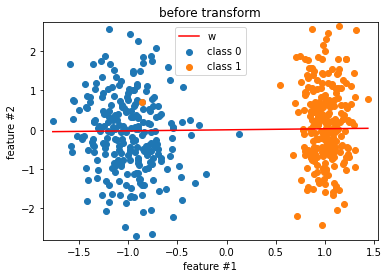

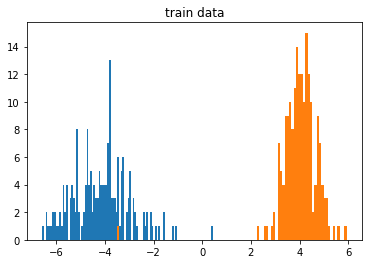

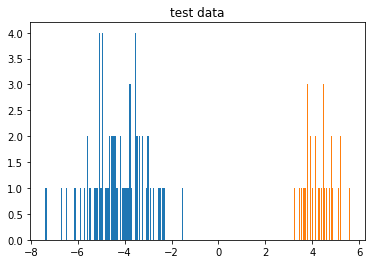

In [13]:
label0 = y==0
label1 = y==1
#plt.subplot(1,3,1)
plt.plot(t, slope *t , color = 'red')
plt.scatter(x[label0, 0], x[label0,1])
plt.scatter(x[label1, 0] , x[label1,1])
plt.xlim(np.min(x[:,0])-0.1, np.max(x[:,0])+0.1)
plt.ylim(np.min(x[:,1])-0.1, np.max(x[:,1])+0.1)
plt.xlabel('feature #1')
plt.ylabel('feature #2')

plt.legend(labels=['w', 'class 0', 'class 1'])
plt.title('before transform')

plt.figure()
plt.hist(train_lda[train_target==0], 100)
plt.hist(train_lda[train_target==1], 100)
plt.title('train data')

plt.figure()
plt.hist(test_lda[test_target==0], 100)
plt.hist(test_lda[test_target==1], 100)
plt.title('test data')


In [14]:
from sklearn.datasets import load_iris

iris= load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [16]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


In [17]:
iris_scaled.shape

(150, 4)

In [19]:
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns= lda_columns)
irisDF_lda['target'] = iris.target

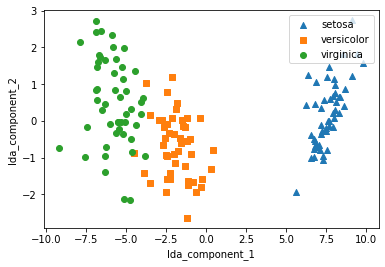

In [20]:
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2 를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [23]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring= 'accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.96


In [28]:
lda_X = irisDF_lda[lda_columns]

In [30]:
lda_X

,lda_component_1,lda_component_2
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463
...,...,...
145,-5.645003,1.677717
146,-5.179565,-0.363475
147,-4.967741,0.821141
148,-5.886145,2.345091


In [29]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, lda_X, iris.target, scoring= 'accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도 : ', scores)
print('원본 데이터 평균 정확도 : ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [1.   0.9  0.96]
원본 데이터 평균 정확도 :  0.9533333333333333


#특잇값 분해

정방 행렬이 아닌 m * n  일반 행렬 A 에 대해

$$A= U\sum V^T$$

1.U
$$AA^T$$
의 고유 벡터를 열에 배치한 m*m행렬

2. V
$$
A^T A
$$
의 고유벡터를 열에 배치한 n*n 행렬

3. Sigma

$$AA^T$$
의 고유값의 제곱근을 대각선에 배치한 m*n대각 행렬